In [1]:
%pip install scikit-learn-intelex
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from sklearnex.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearnex.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [4]:
# Seed for reproducibility
import numpy as np
np.random.seed(0)

In [5]:
# Generating synthetic data
import numpy as np
n_samples = 1000
data = {
    'Cell Voltage (V)': np.random.normal(3.7, 0.1, n_samples),
    'Cell Temperature (°C)': np.random.normal(25, 5, n_samples),
    'Charge Current (A)': np.random.normal(5, 1, n_samples),
    'Discharge Current (A)': np.random.normal(4, 1, n_samples),
    'State of Charge (%)': np.random.uniform(20, 100, n_samples),
    'State of Health (%)': np.random.uniform(80, 100, n_samples),
}

In [6]:
# Simplistic rule for when balancing is needed
data['Need for Balancing'] = ((data['Cell Voltage (V)'] < 3.6) | 
                              (data['Cell Voltage (V)'] > 4.2) | 
                              (data['Cell Temperature (°C)'] > 30) |
                              (data['State of Charge (%)'] < 20) |
                              (data['State of Health (%)'] < 90)).astype(int)


In [7]:
import pandas as pd
df = pd.DataFrame(data)

In [8]:
# Splitting the dataset
X = df.drop('Need for Balancing', axis=1)
y = df['Need for Balancing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [9]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [10]:
# Model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)



LogisticRegression()

In [11]:
# Predictions and evaluation
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.89      0.79      0.84        68
           1       0.90      0.95      0.92       132

    accuracy                           0.90       200
   macro avg       0.89      0.87      0.88       200
weighted avg       0.89      0.90      0.89       200



In [12]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /srv/jupyter/python-venv/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


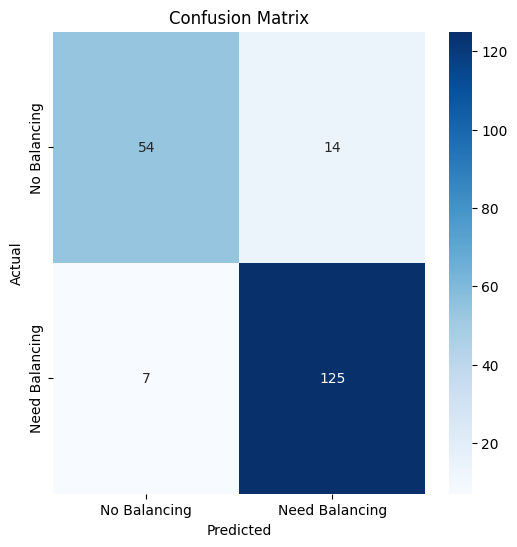

In [13]:
# Assuming the previous code steps have been executed up to the model evaluation
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Balancing", "Need Balancing"], yticklabels=["No Balancing", "Need Balancing"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [14]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


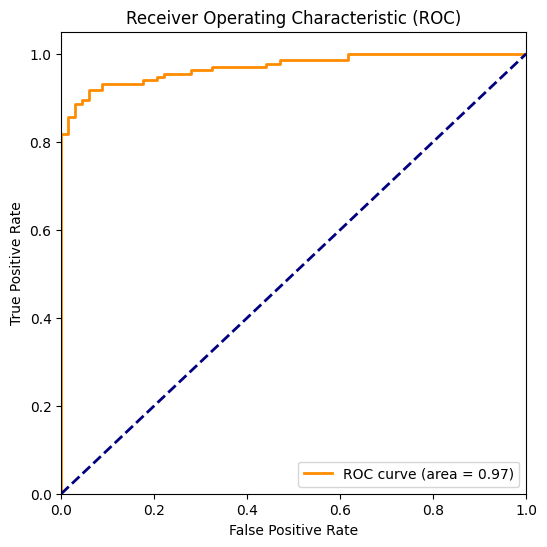

In [15]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()